# Modelos de Regresón Lineal

## Modelo con datos simulados

Vamos a simular datos para las variables que permiten estimar y.

* _y = a + b * x_
* **x**: 100 valores distribuidos segun normal = 1,5 y desviacion estandar= 2,5
* **Ye** : 4 + 0.2 * x + e ---> y estimada
* **e** estara distribuida segun una normal 0 y desviacion estandar 0.8

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100) #randn genera la normal de tamaño 100

In [3]:
res = 0 + 0.8 * np.random.randn(100) #es el error

In [4]:
y_pred = 5 + 1.9 * x #lo que nos devuelve el modelo lineal

In [5]:
y_act =  5 + 1.9 * x + res #los datos que observamos

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

Ahora vamos a crear el dataset

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,4.319231,13.924309,13.206539
1,3.436174,11.054295,11.528730
2,-0.387400,5.016760,4.263939
3,-2.306833,-0.292999,0.617018
4,5.534706,15.158033,15.515942


Vamos a realizar un plot del valor actual que somos capaces de medir y de la prediccion del mismo frente a la variable de entrada

In [9]:
import matplotlib.pyplot as plt

In [10]:
#voy a obtener el promedio de los valores actuales de y
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+ 1)] #un vector que contiene el promedio,tantas veces como tenga x
# para luego mostrar linea de promedios para cada x

Text(0.5, 1.0, 'Valor actual vs prediccion')

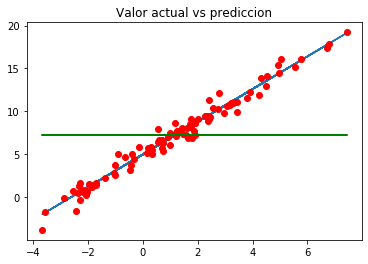

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor actual vs prediccion")

La linea azul es la prediccion y los rojos son los valores actuales o exactamente los valores de la muestra tomada. La prediccion esta muy cerca y estan bien conseguidos esos valores

![Valores regresion lineal](../Recursos/imgs/regresion_lineal.png)

* **SSD** : Suma de los cuadrados de las diferencias
* **SST** :  Suma de los cuadrados totales
* **SSR** : suma de los cuadrtados de regresion

Todos estos se marcan en diferente color en el grafico y se refeiren a la distancia entre cada uno de los diferentes parametros.
* promedio (linea verde)
* modelo regresion (linea azul)

_Vamos a calcular los anteriores parametrospara ver si nuestro modelo ha sido efectivo_

In [12]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,4.319231,13.924309,13.206539,35.934562,0.515194,45.055165
1,3.436174,11.054295,11.528730,18.634200,0.225088,14.763272
2,-0.387400,5.016760,4.263939,8.691033,0.566739,4.819058
3,-2.306833,-0.292999,0.617018,43.493723,0.828130,56.324928
4,5.534706,15.158033,15.515942,68.955541,0.128099,63.139528


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

2106.3690676340334

In [16]:
SSD

54.34419668554029

In [17]:
SST

2186.237162556428

In [18]:
SSR+SSD

2160.7132643195737

In [19]:
R2 = SSR/SST

In [20]:
R2

0.963467780947881

(array([ 4.,  3.,  4., 12., 25., 25., 16.,  6.,  2.,  3.]),
 array([-1.9296951 , -1.54148631, -1.15327752, -0.76506873, -0.37685994,
         0.01134885,  0.39955764,  0.78776642,  1.17597521,  1.564184  ,
         1.95239279]),
 <a list of 10 Patch objects>)

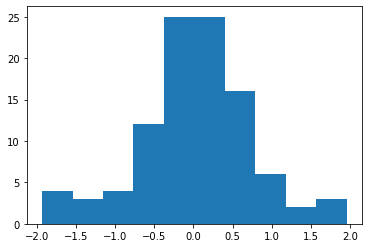

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo recta de regresion
* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.1755082391062195, 7.211994963096895)

In [23]:
#primero el numerador
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) #data x es un array  de varios valores

#luego el denomionador
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
#Unimos y obtenemos el valor final de beta
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.96494813623624, 1.9115534473575153)

El modelo lineal obtenido por regresion es:
**y = 4.90 +1.93 * x** _se aproximaron los valores obtenidos_

In [27]:
#añadimos una columna adicional al dataset con el modelo
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.319231,13.924309,13.206539,35.934562,0.515194,45.055165,21.101657,9.882994,13.221389
1,3.436174,11.054295,11.528730,18.634200,0.225088,14.763272,8.686156,5.110608,11.533378
2,-0.387400,5.016760,4.263939,8.691033,0.566739,4.819058,3.430952,2.442684,4.224411
3,-2.306833,-0.292999,0.617018,43.493723,0.828130,56.324928,26.134946,12.126699,0.555314
4,5.534706,15.158033,15.515942,68.955541,0.128099,63.139528,34.638357,19.002609,15.544835


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(2132.0169476186334, 54.22021493779552, 2186.237162556428)

In [31]:
R2 = SSR / SST
R2

0.9751992986550493

Text(0.5, 1.0, 'Valor Actual vs Predicción')

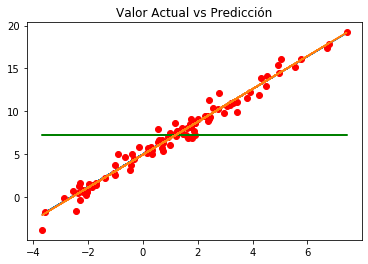

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

#### **NOTA:**
Revisa el notebook original para conocer **los cambios realizados con valores diferentes de "b" en el modelo** que dieron una gran dispersion y lineas paralelas en el grafico:
https://github.com/joanby/python-ml-course/blob/master/notebooks/T4%20-%201%20-%20Linear%20Regression%20-%20Datos%20ficticios.ipynb

## Error estándar de los residuos (RSE)

In [34]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE #cuanto menor sea, mucho mas exacto es el modelo

0.7438195341379926

In [35]:
np.mean(data["y_actual"])

7.211994963096895

In [36]:
RSE / np.mean(data["y_actual"])

0.10313644670358864

El RSE es muy bajo, entonces tenemos un buen modelo